In [1]:
%matplotlib inline
from genetic_oscillator_benchmarking import *

## Properties

In [2]:
P = Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [3]:
Q = Atomic(var("x4") < 11/2500); Q

Atomic(x4 < 0.0044)

In [4]:
I = RIF(3, 3.5)

## Launch Runs

In [41]:
restart_pool()

In [54]:
num_runs = 30
duration = 1
warmup = 10

In [63]:
results_unmasked = gen_results_async(
    num_runs,
    P | G(I, Q),
    duration,
    task_description='Unmasked P | G(Q)',
    warmup=warmup,
    use_masks=False,
    symbolic_composition=False,
)

In [57]:
results_masked = gen_results_async(
    num_runs,
    P | G(I, Q),
    duration,
    task_description='Masked P | G(Q)',
    warmup=warmup,
    use_masks=True,
    symbolic_composition=False,
)

In [59]:
results_unmasked_reversed = gen_results_async(
    num_runs,
    G(I, Q) | P,
    duration,
    task_description='Unmasked G(Q) | P',
    warmup=warmup,
    use_masks=False,
    symbolic_composition=False,
)

In [60]:
results_masked_reversed = gen_results_async(
    num_runs,
    G(I, Q) | P,
    duration,
    task_description='Masked G(Q) | P',
    warmup=warmup,
    use_masks=True,
    symbolic_composition=False,
)

In [17]:
results_unmasked[0]['future'].result()[0]

Signal([0.0000000000000000 .. 1.0000000000000000], [([0.0000000000000000 .. 0.86562109364728990], True)], mask=None)

# Results

In [68]:
results_masked.result()[0]['result'][2].events

['Precomposing Contexts',
 'restoring globals',
 'capturing globals [on exit]',
 'Running Flow*',
 'mask intersect check',
 'tentative eval',
 'composing flowpipe',
 'whole domain eval',
 'post retrieve',
 'root detection',
 'root amalgamation',
 'prepare in check',
 'check boolean [unguarded]',
 'observer.check',
 'Monitoring atomic x6 > 1',
 'Monitoring atomic x4 < 0.0044',
 'Monitoring Signal for x6 > 1 | G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044)']

In [70]:
cols_full = [
    'Running Flow*',
    f'Monitoring atomic {P}',
    f'Monitoring atomic {Q}',
    [
        f'Monitoring Signal for {P | G(I, Q)}',
        f'Monitoring Signal for {G(I, Q) | P}',
    ],
    'tentative eval',
    'root detection',
    'composing flowpipe',
]
cols_short = [
    'Flow*', 'P', 'Q', 'P | G(Q)',
    'tentative eval',
    'root detection',
    'composing flowpipe',
]

## Raw results

In [79]:
times_unmasked = total_times(
    results_unmasked.result(),
    cols_full,
    cols_short,
)
times_unmasked

,Flow*,P,Q,P | G(Q),tentative eval,root detection,composing flowpipe,Total
0,52.037740,12.544316,78.657089,92.232064,3.454933,4.858968,79.739956,144.422863
1,51.375145,10.753928,66.280497,77.110278,2.831358,3.764237,68.005957,128.607895
2,54.747924,10.425753,58.642540,69.155701,2.861885,3.312476,60.606175,124.019189
3,66.718146,10.680459,56.093126,66.863914,2.795583,3.255904,58.560597,133.735158
4,57.689099,10.508207,55.692533,66.284383,2.688141,3.239457,58.138569,124.100422
5,61.798969,10.691152,56.943864,67.724546,2.769047,3.302589,59.353515,129.682358
6,63.486842,10.620809,56.197312,66.908410,2.833085,3.321421,58.506237,130.539204
7,49.136164,10.752277,55.916455,66.758264,2.765877,3.239021,58.436995,116.007704
8,50.412652,10.612638,60.614251,71.315902,2.705148,3.457326,62.840851,121.859987
9,50.378213,13.945332,56.239496,70.283216,3.155831,3.405138,61.380609,120.818205


In [80]:
times_unmasked['Flow*'].std()

5.695459372461529

## Save results

In [82]:
series = ['masked', 'unmasked',
          'masked_reversed', 'unmasked_reversed']
# total_timess = {
#    s: pd.load_csv(f'data/analysis3_raw_{s}.csv')
#    for s in series 
# }
total_timess = {
    s: total_times(eval(f'results_{s}').result(), cols_full, cols_short)
    for s in series 
}

In [100]:
for s, d in total_timess.items():
    d.to_csv(f'data/analysis4_no_symbolic_raw_fixed_{s}.csv',
             index=False)

In [89]:
series_names = [
    'Masked',
    'Unmasked',
    'Masked R',
    'Unmasked R',
]

In [90]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,Masked,Unmasked,Masked R,Unmasked R
Flow*,62.203230,53.198168,56.241524,65.440130
P,4.510850,11.202444,3.827142,14.569493
Q,17.824091,59.551076,36.729903,67.733270
P | G(Q),22.435891,71.042613,41.028832,82.775339
tentative eval,0.680032,2.886854,0.910306,2.563380
root detection,1.141466,3.480809,2.105310,3.998113
composing flowpipe,19.818726,62.081013,36.335060,71.419187
Total,84.821867,124.374549,97.436658,148.372361


In [91]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,Masked,Unmasked,Masked R,Unmasked R
Flow*,9.271114,5.695459,10.871657,7.735923
P,0.747356,1.372832,0.594588,2.565025
Q,2.362839,6.096992,4.373150,7.835957
P | G(Q),2.807102,6.753457,4.827006,9.658324
tentative eval,0.110441,0.227195,0.122147,0.319535
root detection,0.150946,0.396194,0.319645,0.567115
composing flowpipe,2.479677,5.914275,4.121043,8.227508
Total,10.760819,8.387741,14.189973,14.815410


In [87]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
masked,4.510850,17.824091
unmasked,11.202444,59.551076
masked_reversed,3.827142,36.729903
unmasked_reversed,14.569493,67.733270


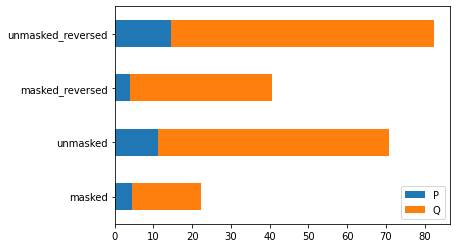

In [92]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [93]:
p.get_figure().savefig('images/comparison-analysis4-bar-chart.pdf')

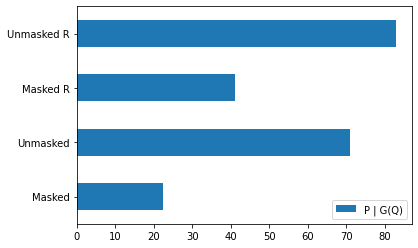

In [94]:
comparison3 = comparison.loc[['P | G(Q)'],:].transpose()
comparison3.plot(kind='barh')